# Uber Fare Analysis Project

**Author:** 24613 Ngwije Ngabo Gerard 
**Date:** July 2025  

## Project Overview
Analyze Uber Fares Dataset for insights into fare patterns and operational metrics.

---

## Phase 1: Project Setup & Data Acquisition

### Step 1.1: Environment Setup

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Analysis
from scipy import stats
import os

# Setup
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Phase 2: Data Loading & Initial Exploration

### Step 2.1: Load the Uber Fares Dataset
Load the raw Uber dataset and perform initial exploration to understand its structure and contents.

In [2]:
# Load the Uber Fares dataset
uber_df = pd.read_csv('../data/raw/uber.csv')

# Display the first 5 rows
display(uber_df.head())

# Show dataset shape
print(f"Dataset shape: {uber_df.shape}")

# Show column names and data types
print("\nColumn info:")
print(uber_df.dtypes)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Dataset shape: (200000, 9)

Column info:
Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


### Step 2.2: Initial Data Quality Assessment

In this section, we will assess the quality of the Uber Fares dataset by checking for missing values, invalid coordinates, outliers in fare amounts, passenger count validity, and duplicate records.

Missing values per column:


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Invalid coordinate records: 3948


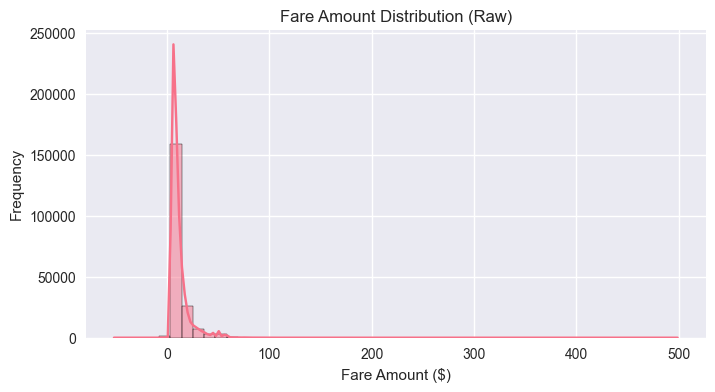

Fare amount summary:


count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

Passenger count value counts:


passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

Duplicate records: 0


In [3]:
# Check for missing values
print("Missing values per column:")
display(uber_df.isnull().sum())

# Check for invalid coordinates (0.0, 0.0)
invalid_coords = ((uber_df['pickup_longitude'] == 0.0) & (uber_df['pickup_latitude'] == 0.0)) | \
                ((uber_df['dropoff_longitude'] == 0.0) & (uber_df['dropoff_latitude'] == 0.0))
print(f"Invalid coordinate records: {invalid_coords.sum()}")

# Analyze fare amount distribution
plt.figure(figsize=(8,4))
sns.histplot(uber_df['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution (Raw)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Detect outliers in fare amount
print("Fare amount summary:")
display(uber_df['fare_amount'].describe())

# Examine passenger count ranges and validity
print("Passenger count value counts:")
display(uber_df['passenger_count'].value_counts())

# Check for duplicate records
duplicates = uber_df.duplicated().sum()
print(f"Duplicate records: {duplicates}")

### Step 2.3: Data Cleaning Process

Based on the initial assessment, we will now clean the dataset by removing invalid records, filtering out unrealistic values, handling missing data, and standardizing formats.

In [4]:
# Remove records with invalid coordinates
cleaned_df = uber_df.copy()
invalid_coords = ((cleaned_df['pickup_longitude'] == 0.0) & (cleaned_df['pickup_latitude'] == 0.0)) | \
                ((cleaned_df['dropoff_longitude'] == 0.0) & (cleaned_df['dropoff_latitude'] == 0.0))
cleaned_df = cleaned_df[~invalid_coords]

# Filter out unrealistic fare amounts (<$1 or >$200)
cleaned_df = cleaned_df[(cleaned_df['fare_amount'] >= 1) & (cleaned_df['fare_amount'] <= 200)]

# Handle missing values (drop rows with any missing values)
cleaned_df = cleaned_df.dropna()

# Validate and clean passenger count (keep 1-6 only)
cleaned_df = cleaned_df[(cleaned_df['passenger_count'] >= 1) & (cleaned_df['passenger_count'] <= 6)]

# Standardize datetime format
cleaned_df['pickup_datetime'] = pd.to_datetime(cleaned_df['pickup_datetime'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['pickup_datetime'])

# Remove duplicates
cleaned_df = cleaned_df.drop_duplicates()

# Save cleaned dataset
cleaned_df.to_csv('../data/cleaned/uber_cleaned.csv', index=False)

print(f"Cleaned dataset shape: {cleaned_df.shape}")

Cleaned dataset shape: (195338, 9)


### Step 2.4: Data Quality Report & Before/After Comparison

We now summarize the cleaning process, document the changes made, and compare key statistics and distributions before and after cleaning.

--- Data Quality Report ---
Original dataset shape: (200000, 9)
Cleaned dataset shape: (195338, 9)
Records removed: 4662

Fare Amount Statistics (Before Cleaning):


count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64


Fare Amount Statistics (After Cleaning):


count    195338.000000
mean         11.346886
std           9.708082
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         200.000000
Name: fare_amount, dtype: float64


Passenger Count (Before Cleaning):


passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64


Passenger Count (After Cleaning):


passenger_count
1    135639
2     28866
5     13740
3      8706
6      4203
4      4184
Name: count, dtype: int64

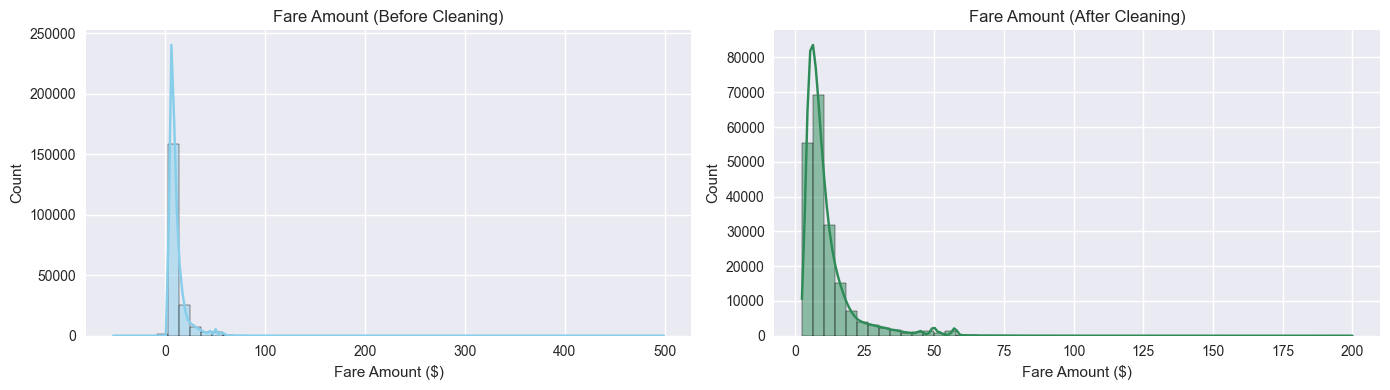

In [5]:
# Data Quality Report
print("--- Data Quality Report ---")
print(f"Original dataset shape: {uber_df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")
print(f"Records removed: {uber_df.shape[0] - cleaned_df.shape[0]}")

# Compare fare amount statistics before and after cleaning
print("\nFare Amount Statistics (Before Cleaning):")
display(uber_df['fare_amount'].describe())
print("\nFare Amount Statistics (After Cleaning):")
display(cleaned_df['fare_amount'].describe())

# Compare passenger count statistics before and after cleaning
print("\nPassenger Count (Before Cleaning):")
display(uber_df['passenger_count'].value_counts())
print("\nPassenger Count (After Cleaning):")
display(cleaned_df['passenger_count'].value_counts())

# Visualize fare amount distribution before and after cleaning
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(uber_df['fare_amount'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Fare Amount (Before Cleaning)')
axes[0].set_xlabel('Fare Amount ($)')
sns.histplot(cleaned_df['fare_amount'], bins=50, kde=True, ax=axes[1], color='seagreen')
axes[1].set_title('Fare Amount (After Cleaning)')
axes[1].set_xlabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

## Phase 3: Exploratory Data Analysis (EDA)

In this phase, we will perform comprehensive exploratory data analysis on the cleaned Uber dataset to uncover patterns, trends, and insights. The analysis will include descriptive statistics, visualizations, temporal and geographic analysis, and correlation studies.

In [6]:
# Reload the cleaned dataset for EDA
eda_df = pd.read_csv('../data/cleaned/uber_cleaned.csv', parse_dates=['pickup_datetime'])

# Show basic info
display(eda_df.head())
print(f"Cleaned dataset shape: {eda_df.shape}")
print("\nColumn info:")
print(eda_df.dtypes)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


Cleaned dataset shape: (195338, 9)

Column info:
Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


### Step 3.1: Descriptive Statistics

We begin EDA by calculating detailed statistics for fare amounts, passenger counts, and other numeric variables.

In [7]:
# Descriptive statistics for fare amount
print('Fare Amount Statistics:')
display(eda_df['fare_amount'].describe())

# Mode for fare amount
fare_mode = eda_df['fare_amount'].mode()[0]
print(f"Mode: {fare_mode}")

# Quartiles and IQR
Q1 = eda_df['fare_amount'].quantile(0.25)
Q2 = eda_df['fare_amount'].quantile(0.5)
Q3 = eda_df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q2 (Median): {Q2}, Q3: {Q3}, IQR: {IQR}")

# Passenger count distribution
print('\nPassenger Count Distribution:')
display(eda_df['passenger_count'].value_counts().sort_index())

# Summary statistics for all numeric variables
print('\nSummary Statistics for All Numeric Variables:')
display(eda_df.describe())

Fare Amount Statistics:


count    195338.000000
mean         11.346886
std           9.708082
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         200.000000
Name: fare_amount, dtype: float64

Mode: 6.5
Q1: 6.0, Q2 (Median): 8.5, Q3: 12.5, IQR: 6.5

Passenger Count Distribution:


passenger_count
1    135639
2     28866
3      8706
4      4184
5     13740
6      4203
Name: count, dtype: int64


Summary Statistics for All Numeric Variables:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.953380e+05,195338.000000,195338.000000,195338.000000,195338.000000,195338.000000,195338.000000
mean,2.771548e+07,11.346886,-73.926486,40.704802,-73.913114,40.687735,1.690111
std,1.600910e+07,9.708082,5.482037,5.438801,8.549676,4.004548,1.306111
min,1.000000e+00,2.500000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,1.383455e+07,6.000000,-73.992268,40.736392,-73.991592,40.735266,1.000000
50%,2.775954e+07,8.500000,-73.982101,40.753276,-73.980521,40.753723,1.000000
75%,4.154768e+07,12.500000,-73.968315,40.767540,-73.965314,40.768320,2.000000
max,5.542357e+07,200.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


### Step 3.2: Fare Distribution Visualizations

We will visualize fare distributions using box plots and violin plots to identify outliers and understand the spread.

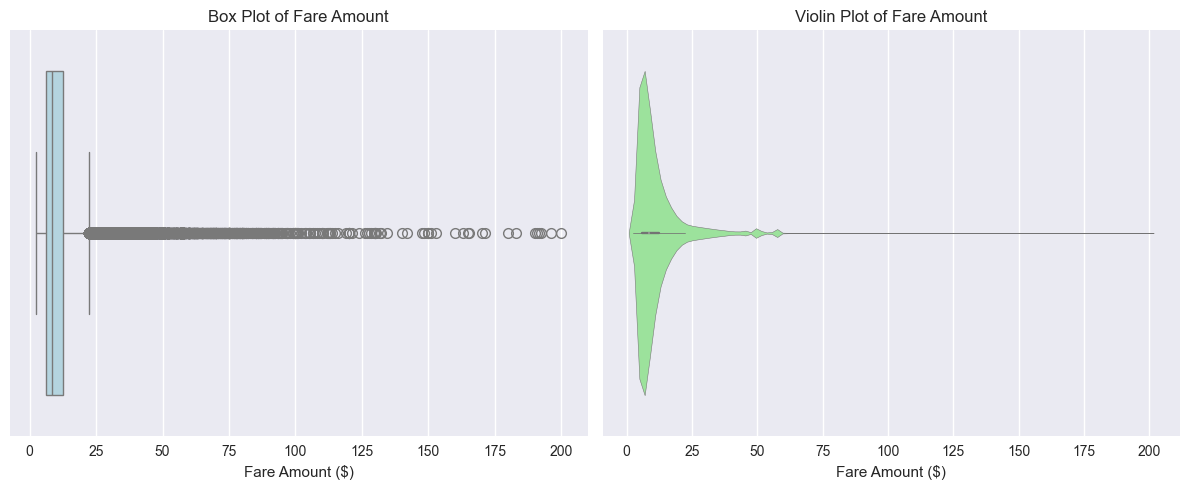

In [8]:
# Box plot and violin plot for fare amount
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=eda_df['fare_amount'], color='lightblue')
plt.title('Box Plot of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.subplot(1,2,2)
sns.violinplot(x=eda_df['fare_amount'], color='lightgreen')
plt.title('Violin Plot of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

### Step 3.3: Fare Amount vs. Distance Traveled

We will calculate the trip distance using the Haversine formula and analyze the relationship between fare amount and distance.

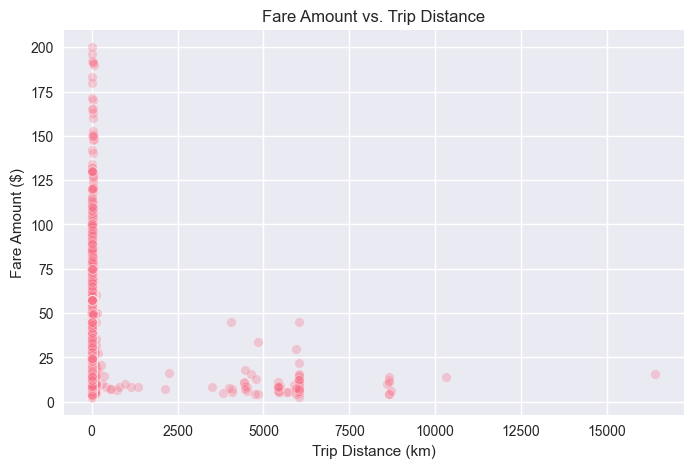

In [11]:
# Calculate trip distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    from numpy import radians, sin, cos, sqrt, arctan2
    R = 6371  # Earth radius in kilometers
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arctan2(sqrt(a), sqrt(1-a))
    return R * c

eda_df['trip_distance_km'] = haversine(
    eda_df['pickup_longitude'], eda_df['pickup_latitude'],
    eda_df['dropoff_longitude'], eda_df['dropoff_latitude']
)

# Scatter plot: Fare amount vs. trip distance
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance_km', y='fare_amount', data=eda_df, alpha=0.3)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

### Step 3.4: Fare Amount vs. Time of Day

We will analyze how fare amounts vary by hour of the day.

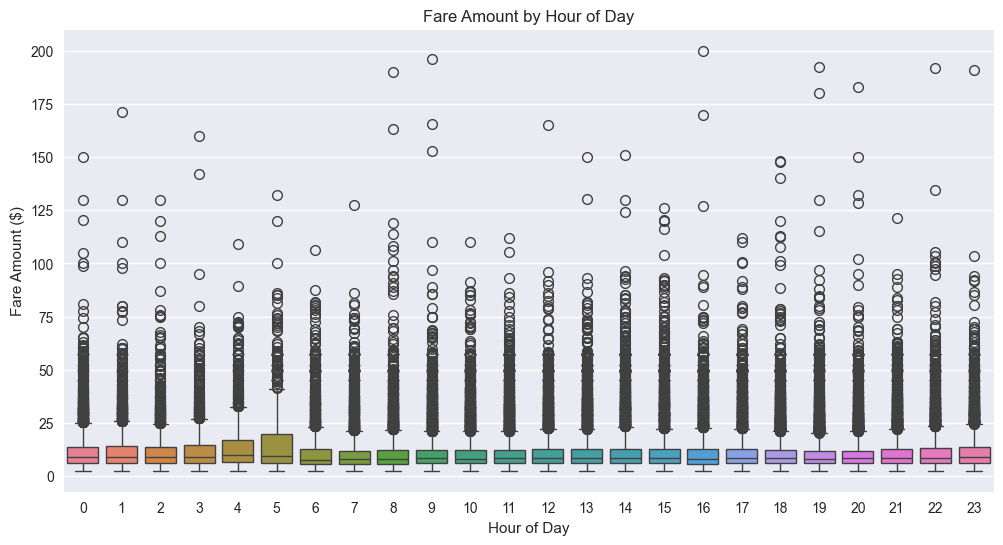

In [12]:
# Extract hour from pickup_datetime
eda_df['pickup_hour'] = eda_df['pickup_datetime'].dt.hour

# Boxplot: Fare amount by hour of day
plt.figure(figsize=(12,6))
sns.boxplot(x='pickup_hour', y='fare_amount', data=eda_df, palette='husl')
plt.title('Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount ($)')
plt.show()

### Step 3.5: Correlation Analysis

We will examine correlations between key numeric variables using a heatmap.

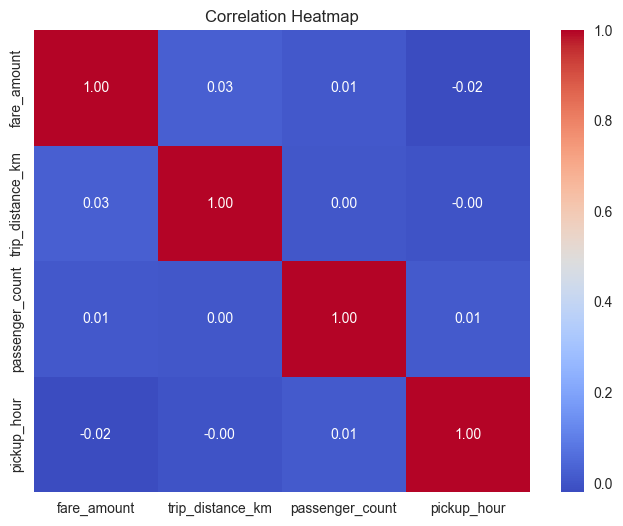

In [13]:
# Correlation heatmap of numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(eda_df[['fare_amount', 'trip_distance_km', 'passenger_count', 'pickup_hour']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Phase 4: Feature Engineering

In this phase, we will create new analytical features from the cleaned dataset to enhance insights and prepare the data for advanced analysis and Power BI import. This includes extracting time-based, temporal, geographic, and fare-related features, as well as encoding categorical variables.

In [9]:
# Extract time-based features from pickup_datetime
fe_df = eda_df.copy()
fe_df['hour'] = fe_df['pickup_datetime'].dt.hour
fe_df['day_of_week'] = fe_df['pickup_datetime'].dt.dayofweek
fe_df['month'] = fe_df['pickup_datetime'].dt.month
fe_df['year'] = fe_df['pickup_datetime'].dt.year
fe_df['is_weekend'] = fe_df['day_of_week'].isin([5,6])

# Time period categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
fe_df['time_period'] = pd.cut(fe_df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Peak hour indicator (7-9 AM, 5-7 PM)
fe_df['is_peak_hour'] = fe_df['hour'].isin([7,8,9,17,18,19])

In [10]:
# Advanced temporal features
# Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
fe_df['season'] = fe_df['month'].apply(get_season)

# US holidays (approximate, for demonstration)
us_holidays = pd.to_datetime([
    '2009-01-01', '2009-07-04', '2009-12-25',
    '2010-01-01', '2010-07-04', '2010-12-25',
    '2011-01-01', '2011-07-04', '2011-12-25',
    '2012-01-01', '2012-07-04', '2012-12-25',
    '2013-01-01', '2013-07-04', '2013-12-25',
    '2014-01-01', '2014-07-04', '2014-12-25',
    '2015-01-01', '2015-07-04', '2015-12-25'
])
fe_df['is_holiday'] = fe_df['pickup_datetime'].dt.normalize().isin(us_holidays)

# Day type: Weekday, Weekend, Holiday
fe_df['day_type'] = np.select(
    [fe_df['is_holiday'], fe_df['is_weekend']],
    ['Holiday', 'Weekend'],
    default='Weekday'
)

In [21]:
# Geographical features
from sklearn.cluster import KMeans
# Cluster pickup and dropoff locations into 10 zones each (for demonstration)
coords = fe_df[['pickup_longitude', 'pickup_latitude']].dropna()
kmeans_pickup = KMeans(n_clusters=10, random_state=42, n_init=10).fit(coords)
fe_df['pickup_zone'] = kmeans_pickup.predict(fe_df[['pickup_longitude', 'pickup_latitude']].fillna(0))
coords = fe_df[['dropoff_longitude', 'dropoff_latitude']].dropna()
kmeans_dropoff = KMeans(n_clusters=10, random_state=42, n_init=10).fit(coords)
fe_df['dropoff_zone'] = kmeans_dropoff.predict(fe_df[['dropoff_longitude', 'dropoff_latitude']].fillna(0))

# Airport trip indicator (JFK/LGA proximity)
def is_airport_trip(row):
    # JFK: (lat 40.6413, lon -73.7781), LGA: (lat 40.7769, lon -73.8740)
    jfk = (40.6413, -73.7781)
    lga = (40.7769, -73.8740)
    def near_airport(lat, lon, airport):
        return np.sqrt((lat-airport[0])**2 + (lon-airport[1])**2) < 0.03
    return (
        near_airport(row['pickup_latitude'], row['pickup_longitude'], jfk) or
        near_airport(row['dropoff_latitude'], row['dropoff_longitude'], jfk) or
        near_airport(row['pickup_latitude'], row['pickup_longitude'], lga) or
        near_airport(row['dropoff_latitude'], row['dropoff_longitude'], lga)
    )
fe_df['is_airport_trip'] = fe_df.apply(is_airport_trip, axis=1)

# Manhattan distance approximation
fe_df['manhattan_distance_km'] = (
    np.abs(fe_df['pickup_longitude'] - fe_df['dropoff_longitude']) +
    np.abs(fe_df['pickup_latitude'] - fe_df['dropoff_latitude'])
) * 111  # rough conversion to km

In [11]:
# Display the new features added to fe_df (columns not in eda_df)
new_features = [col for col in fe_df.columns if col not in eda_df.columns]
print("New features added to fe_df:")
for feature in new_features:
    print(f"- {feature}")
display(fe_df[new_features].head())

New features added to fe_df:
- hour
- day_of_week
- month
- year
- is_weekend
- time_period
- is_peak_hour
- season
- is_holiday
- day_type


,hour,day_of_week,month,year,is_weekend,time_period,is_peak_hour,season,is_holiday,day_type
0,19,3,5,2015,False,Evening,True,Spring,False,Weekday
1,20,4,7,2009,False,Evening,False,Summer,False,Weekday
2,21,0,8,2009,False,Evening,False,Summer,False,Weekday
3,8,4,6,2009,False,Morning,True,Summer,False,Weekday
4,17,3,8,2014,False,Afternoon,True,Summer,False,Weekday


In [22]:
# Fare-related features
fe_df['fare_per_km'] = fe_df['fare_amount'] / (fe_df['trip_distance_km'] + 1e-3)

# Fare category (Low/Medium/High)
fare_bins = [0, 10, 30, np.inf]
fare_labels = ['Low', 'Medium', 'High']
fe_df['fare_category'] = pd.cut(fe_df['fare_amount'], bins=fare_bins, labels=fare_labels, right=False)

# Encode categorical variables (one-hot for time_period, season, day_type)
fe_df = pd.get_dummies(fe_df, columns=['time_period', 'season', 'day_type', 'fare_category'], drop_first=True)

# Save enhanced dataset
fe_df.to_csv('../data/enhanced/uber_enhanced.csv', index=False)
print('Enhanced dataset saved to data/enhanced/uber_enhanced.csv')

Enhanced dataset saved to data/enhanced/uber_enhanced.csv
